In [8]:
import torch
import matplotlib.pyplot as plt

from PIL import Image
from typing import List
from diffusers import StableDiffusionPipeline


In [9]:
stable_diffusion_prompt = """
temple in ruines, forest, stairs, columns, cinematic, detailed, atmospheric, epic, concept art, 
Matte painting, background, mist, photo-realistic, concept art, volumetric light, 
cinematic epic + rule of thirds octane render, 8k, corona render, movie concept art, octane render, 
trending on artstation, movie concept art, cinematic composition , ultra-detailed, realistic , 
hyper-realistic, volumetric lighting, 8k –ar 2:3 –test –uplight
"""


In [10]:
openjourney_prompt = "mdjrny-v4 style " + stable_diffusion_prompt


In [11]:
def count_tokens(string: str) -> int:
    """
    Count the number of tokens within a string.

    :param string: The input string.
    :type string: str
    :return: The number of tokens in the string.
    :rtype: int
    """
    tokens = string.split()
    count = len(tokens)
    if count > 77:
        print("Warning: The number of tokens is greater than 77.")
    return count


In [13]:
count_tokens(stable_diffusion_prompt)

57

In [14]:
def generate_stable_diffusion_images(
    prompt: str, num_of_imgs: int = 2
) -> List[torch.Tensor]:
    """
    Generates stable diffusion images based on a given prompt.

    :param prompt: The prompt used to generate the images.
    :type prompt: str
    :param num_of_imgs: The number of images to generate. Default is 2.
    :type num_of_imgs: int
    :return: A list of generated images.
    :rtype: List[torch.Tensor]
    """
    # model_path = "prompthero/openjourney"
    model_path = "runwayml/stable-diffusion-v1-5"

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    pipe = StableDiffusionPipeline.from_pretrained(
        model_path, torch_dtype=torch.float32
    ).to(device)

    images = [pipe(prompt).images[0] for i in range(num_of_imgs)]

    fig, ax = plt.subplots(1, num_of_imgs, figsize=(15, 5))
    for i, image in enumerate(images):
        ax[i].imshow(image)
        ax[i].axis("off")

    plt.tight_layout()
    plt.show()

    return images


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (102 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- detailed, realistic, hyper - realistic, volumetric lighting, 8 k – ar 2 : 3 – test – uplight']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- detailed, realistic, hyper - realistic, volumetric lighting, 8 k – ar 2 : 3 – test – uplight']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- detailed, realistic, hyper - realistic, volumetric lighting, 8 k – ar 2 : 3 – test – uplight']


  0%|          | 0/50 [00:00<?, ?it/s]

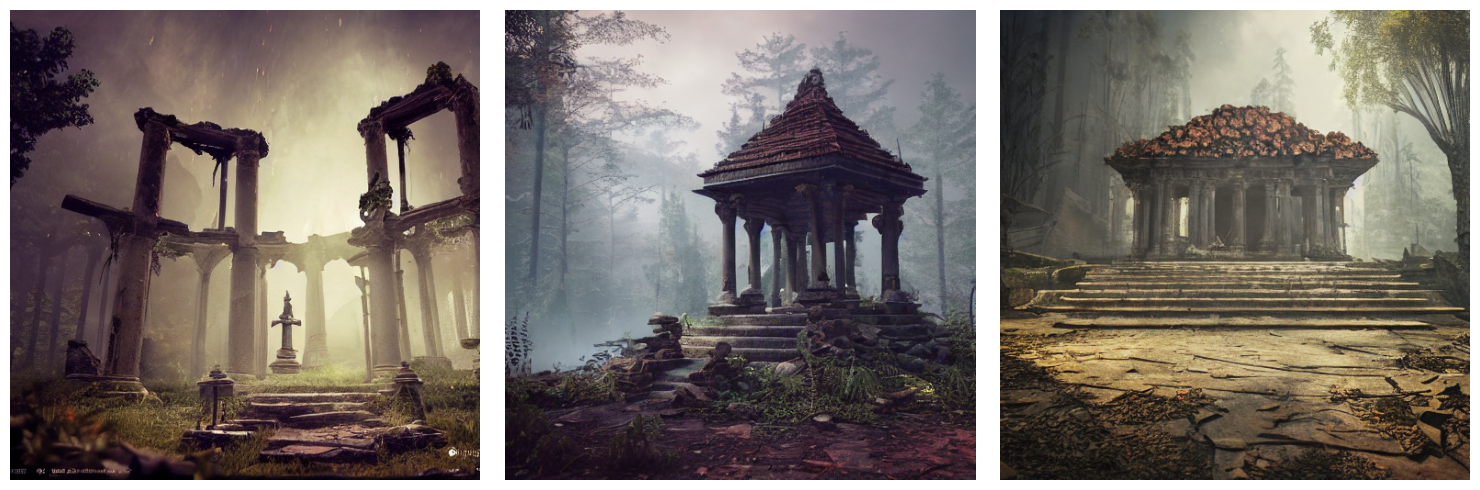

In [16]:
generated_images = generate_stable_diffusion_images(prompt=stable_diffusion_prompt, num_of_imgs=3)


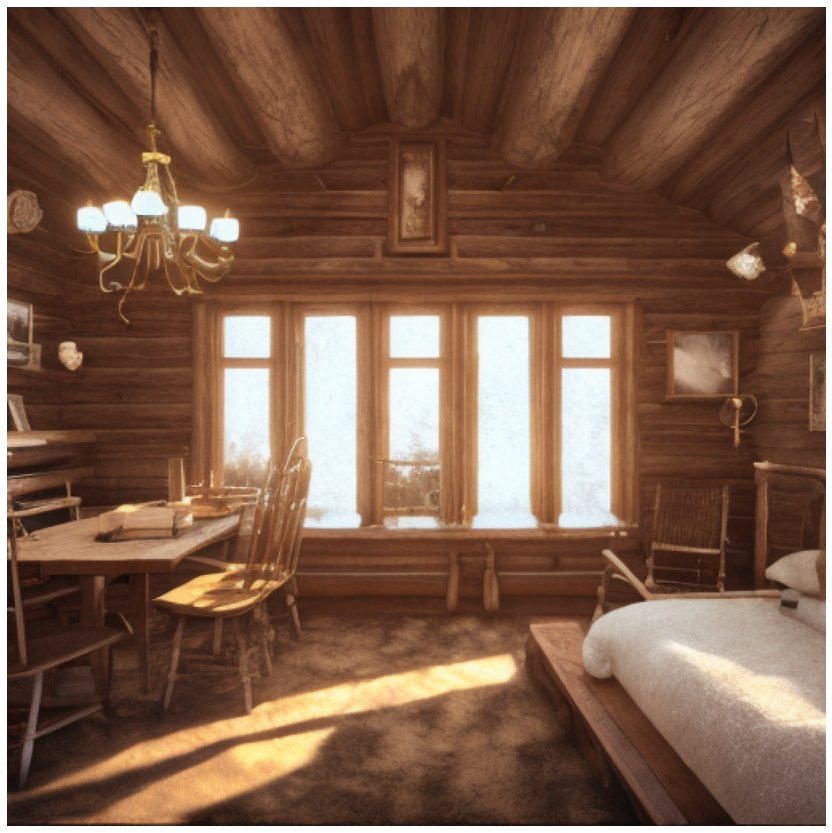

In [34]:
fig, ax = plt.subplots(figsize=(12, 12), dpi=70)
ax.imshow(generated_images[0])
ax.axis("off")

plt.tight_layout()
plt.show()


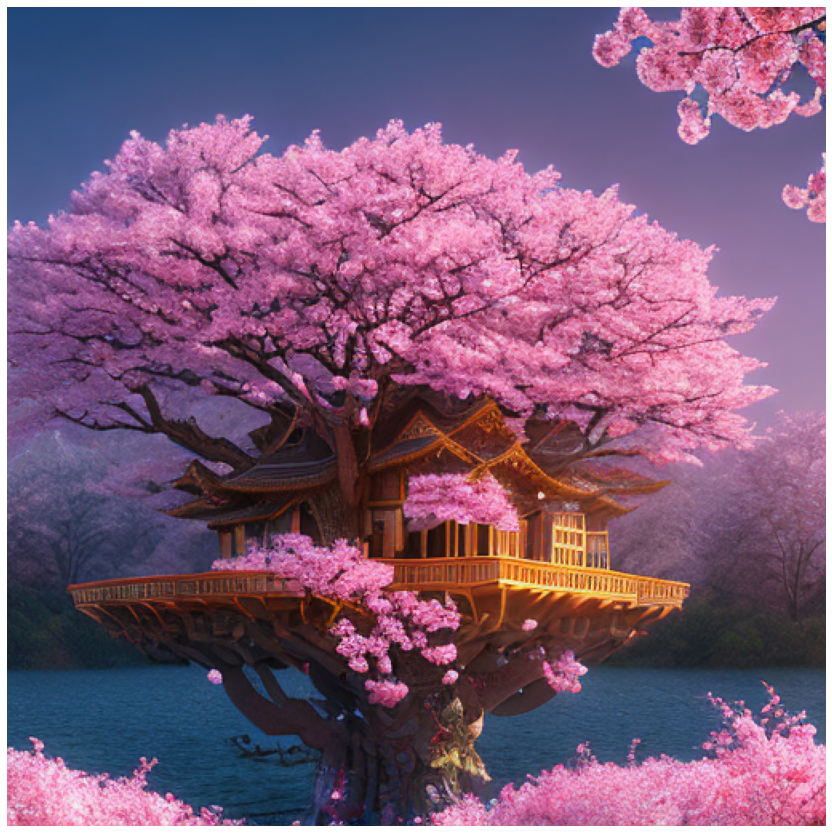

In [14]:
fig, ax = plt.subplots(figsize=(12, 12), dpi=70)
ax.imshow(generated_images[0])
ax.axis("off")

plt.tight_layout()
plt.show()


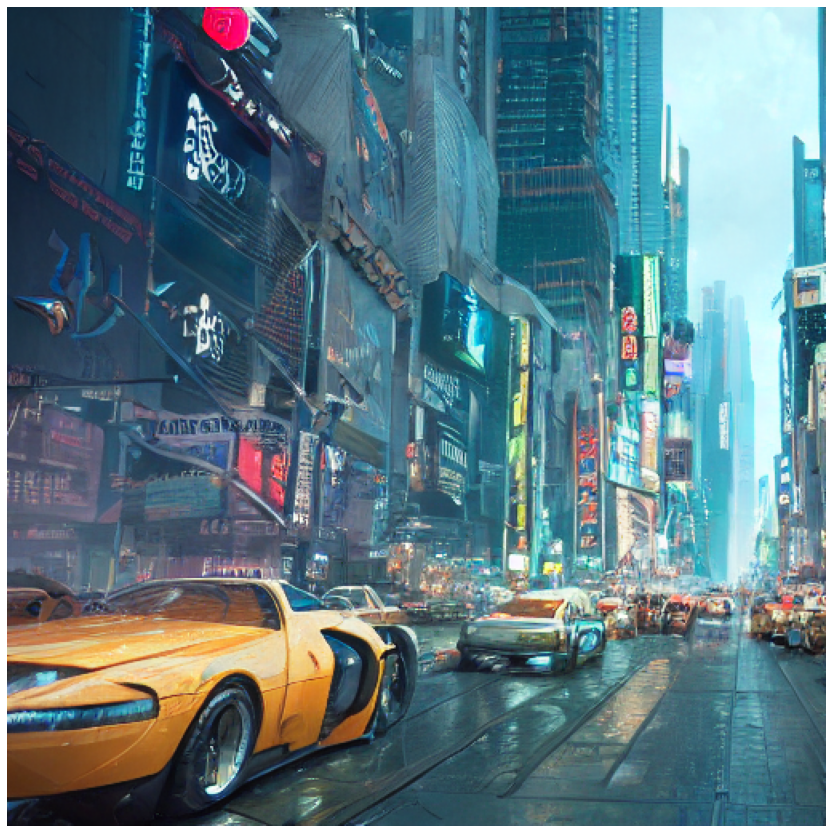

In [34]:
fig, ax = plt.subplots(figsize=(12, 12), dpi=70)
ax.imshow(generated_images[1])
ax.axis("off")

plt.tight_layout()
plt.show()


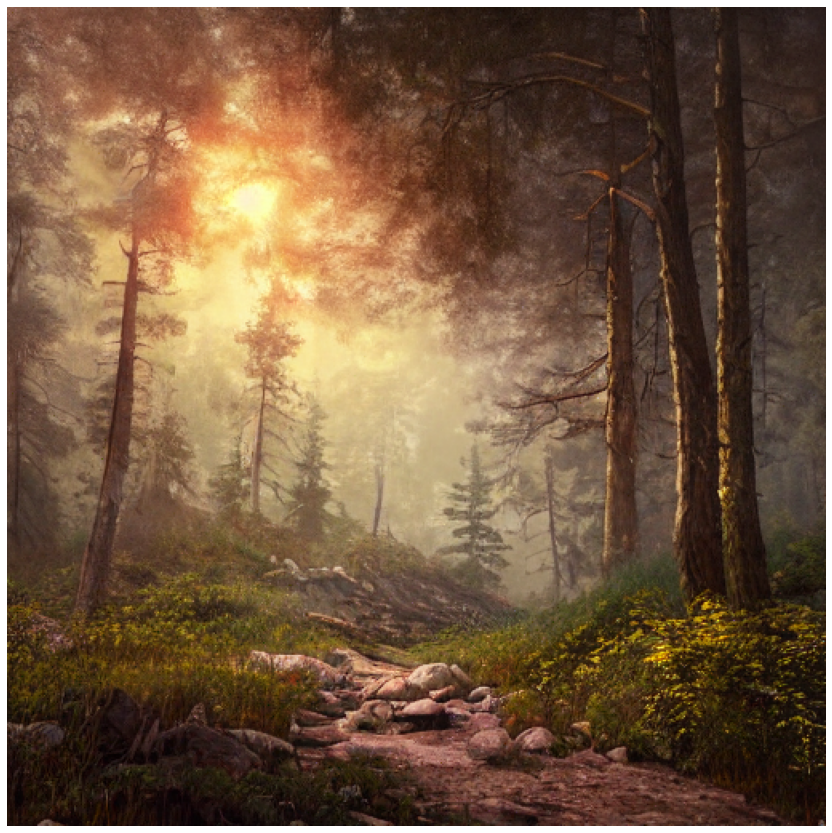

In [27]:
fig, ax = plt.subplots(figsize=(12, 12), dpi=70)
ax.imshow(generated_images[1])
ax.axis("off")

plt.tight_layout()
plt.show()
